*   About CIFAR-10 dataset: used for image classification tasks

*   Contains 32x32 color images (RGB) with 3 color channels.

*  Each image in the CIFAR-10 dataset is a grid of pixels that is 32 pixels wide and 32 pixels tall.

*   Each pixel represents a tiny dot of color that contributes to the overall image.

*   Each pixel  is represented using RGB (Red, Green, Blue) color channels.

*   Each image has 3072 pixels in total (32x32x3).

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
#layers is imported to create neural network layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Tuples are to store multiple related data items in an organized way.
#The load_data() function returns two tuples: Training data: (X_train, y_train) and Testing data: (X_test, y_test)
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
#y_train need not be a 2d array
y_train = y_train.reshape(-1,)
#-1 because the first dimension which is 50000 should remain the same hence -1
#the second dimension which are the columns can be dropped hence left blank
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
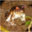

In [ ]:
X_train[0]
#The returned value is a 3D NumPy array with the shape (32, 32, 3)
#each value is an rgb value denoting intensity

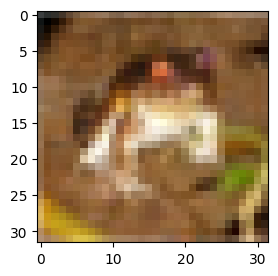

In [ ]:
plt.figure(figsize=(14,3))
plt.imshow(X_train[0])
#imshow is used for displaying images

In [ ]:
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot(x, y, idx):
    plt.figure(figsize = (14,3))
    plt.imshow(x[idx])
    plt.xlabel(labels[y[idx]])
    #y[idx] is a number from 0 to 9 as that is what the cintents of y_train are
    #the corresponding label for that number is obtained which is used as the xlabel(here, frog)

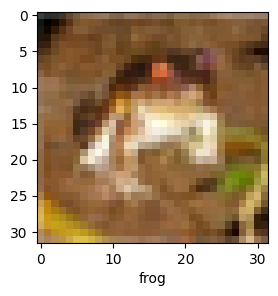

In [ ]:
plot(X_train, y_train, 0)

In [ ]:
#Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255.
#Hence to normalize in 0-->1 range, we need to divide it by 255
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_test[3]
#normalised values

array([[[0.0023837 , 0.00239908, 0.00229143],
        [0.00256824, 0.00270665, 0.00287582],
        [0.00270665, 0.00275279, 0.00296809],
        ...,
        [0.00309112, 0.00301423, 0.00321415],
        [0.0031065 , 0.0031065 , 0.00326028],
        [0.00295271, 0.0028143 , 0.00262976]],

       [[0.00235294, 0.0023837 , 0.00241446],
        [0.00250673, 0.00275279, 0.00313725],
        [0.00262976, 0.00282968, 0.00330642],
        ...,
        [0.0031065 , 0.00319877, 0.00341407],
        [0.00312188, 0.00330642, 0.00349097],
        [0.00290657, 0.00292195, 0.0028143 ]],

       [[0.0023837 , 0.00236832, 0.00235294],
        [0.00246059, 0.00273741, 0.00309112],
        [0.00258362, 0.00284506, 0.00327566],
        ...,
        [0.00316801, 0.00319877, 0.00330642],
        [0.00313725, 0.00330642, 0.00344483],
        [0.00290657, 0.00293733, 0.00282968]],

       ...,

       [[0.0013687 , 0.00121492, 0.00095348],
        [0.00087659, 0.00081507, 0.00079969],
        [0.0009381 , 0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 81ms/step - accuracy: 0.1104 - loss: 2.3015
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 77ms/step - accuracy: 0.1277 - loss: 2.3001
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.1405 - loss: 2.2992
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.1460 - loss: 2.2981
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 78ms/step - accuracy: 0.1547 - loss: 2.2972


ann = models.Sequential: Sequential is a type of model in Keras where layers are stacked sequentially, meaning each layer has one input and one output. It’s useful in image classification, regression.

layers.Flatten(input_shape=(32,32,3)),: This is the first layer in the model.
Flatten: This layer converts a 3D input (e.g., an image) into a 1D array. It's necessary to flatten the 2D image data into a 1D array before passing it to fully connected (Dense) layers.
input_shape=(32, 32, 3): This specifies the shape of the input.

layers.Dense(3000, activation='relu'),
layers.Dense(1000, activation='relu'),
This is a fully connected layer (Dense layer).
The layer has 3000 neurons. Each neuron will compute a weighted sum of its inputs and apply an activation function, in this case tis ReLU

layers.Dense(10, activation='softmax'):
The final layer in the model.
10 corresponds to the number of classes
The softmax activation is typically used in the final layer of a multi-class classification model. It converts the raw output into probabilities for each class.

ann.compile(): prepares the model for training

SGD (Stochastic Gradient Descent) is an optimization algorithm used to update the weights of the model during training.

Loss function: This is used to evaluate how well the model's predictions match the actual labels.
Sparse categorical crossentropy is used when the labels are integers (not one-hot encoded) and the problem is a multi-class classification problem.
For CIFAR-10, the labels are integers between 0 and 9 (representing 10 classes), so we use sparse categorical crossentropy. If the labels were one-hot encoded, we would use categorical_crossentropy instead.

Accuracy is a common metric for classification tasks. It measures how many predictions are correct, i.e., how often the model's predicted class matches the true class.

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
#The predict() method is used to make predictions on new, unseen data using the trained model.
y_pred_classes = [np.argmax(element) for element in y_pred]
#y_pred is a 2D array where each row in y_pred corresponds to a single sample and each column in that row contains the predicted probability
#y_pred might look something like this for one sample: [0.1, 0.2, 0.05, 0.15, 0.5, 0.05, 0.05, 0.1, 0.1, 0.05]
#np.argmax() is a NumPy function that returns the index of the maximum value in an array.
#list comprehension: the stuff before for loop is a single element in the list and the for is iterating over each ele in y_pred
#(each ele is itself an array)
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.25      0.57      0.35      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.18      0.04      0.06      1000
           4       0.00      0.00      0.00      1000
           5       0.15      0.49      0.23      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.45      0.28      0.35      1000
           9       0.20      0.70      0.31      1000

    accuracy                           0.21     10000
   macro avg       0.12      0.21      0.13     10000
weighted avg       0.12      0.21      0.13     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Each filter detects different features, such as edges, textures, or colors.

This is the size of each filter (also called the kernel). The filter is a 3x3 matrix that slides over the image, performing a convolution operation.

layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),:
This time, there are 64 filters, which allows the model to learn more complex features.

layers.Flatten(): This layer converts the 2D feature maps into a 1D vector. Dense layers require a 1D vector as input.

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
 172/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 31ms/step - accuracy: 0.0948 - loss: 2.3033

KeyboardInterrupt: 

In [ ]:
cnn.evaluate(X_test,y_test)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
y_test[:5]

In [ ]:
plot(X_test, y_test,3)

In [ ]:
[y_classes[3]]